Load the data and exlude 2014 and 2015

In [2]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac_orj = pd.read_csv(u'arac.csv',sep=';')
df_arac_sample = df_arac_orj[df_arac_orj.Year < 2014]
df_arac_test = df_arac_orj[df_arac_orj.Year >= 2014]

print('Sample :\n')
print df_arac_sample[['Car','Year']]
print('\nTest :\n')
print df_arac_test[['Car','Year']]

#df_arac

Sample :

        Car  Year
0     91469  1966
1    112367  1967
2    125375  1968
3    137345  1969
4    137771  1970
5    153676  1971
6    187272  1972
7    240360  1973
8    313160  1974
9    403546  1975
10   488894  1976
11   560424  1977
12   624438  1978
13   688687  1979
14   742252  1980
15   776432  1981
16   811465  1982
17   856350  1983
18   919577  1984
19   983444  1985
20  1087234  1986
21  1193021  1987
22  1310257  1988
23  1434830  1989
24  1649879  1990
25  1864344  1991
26  2181388  1992
27  2619852  1993
28  2861640  1994
29  3058511  1995
30  3274156  1996
31  3570105  1997
32  3838288  1998
33  4072326  1999
34  4422180  2000
35  4534803  2001
36  4600140  2002
37  4700343  2003
38  5400440  2004
39  5772745  2005
40  6140992  2006
41  6472156  2007
42  6796629  2008
43  7093964  2009
44  7544871  2010
45  8113111  2011
46  8648875  2012
47  9283923  2013

Test :

         Car  Year
48   9857915  2014
49  10509258  2015


Visualize the data

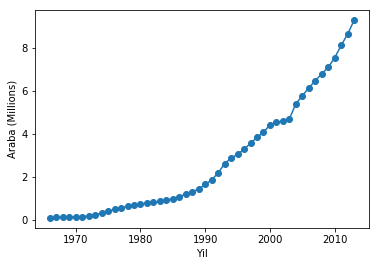

In [3]:
BaseYear = 1995
x = np.matrix(df_arac_sample.Year[0:]).T-BaseYear
y = np.matrix(df_arac_sample.Car[0:]).T/1000000.

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Yil')
plt.ylabel('Araba (Millions)')

plt.show()

A function to predict years 2014 and 2015 according to given degree and prints the graph 

Degree = 1
----------
2014 Actual     : 	9.857915
2014 Prediction : 	7.20808889539
2015 Actual     : 	10.509258
2015 Prediction : 	7.38929039197
Average Prediction Accurcy : 	 %71.7160053694


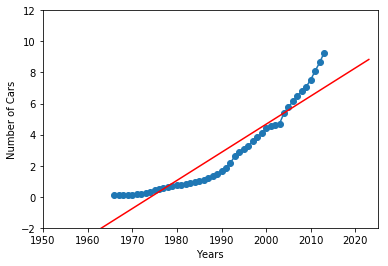

Degree = 2
----------
2014 Actual     : 	9.857915
2014 Prediction : 	9.28718131608
2015 Actual     : 	10.509258
2015 Prediction : 	9.72296555806
Average Prediction Accurcy : 	 %93.364249553


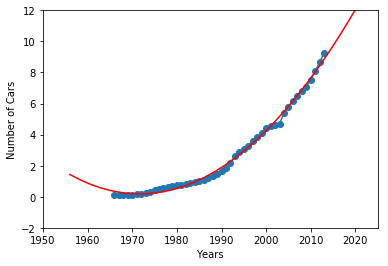

Degree = 3
----------
2014 Actual     : 	9.857915
2014 Prediction : 	9.54271503749
2015 Actual     : 	10.509258
2015 Prediction : 	10.0410789663
Average Prediction Accurcy : 	 %96.1738248566


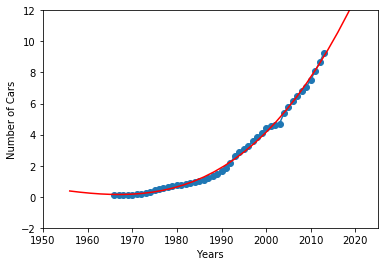

Degree = 4
----------
2014 Actual     : 	9.857915
2014 Prediction : 	9.47687277174
2015 Actual     : 	10.509258
2015 Prediction : 	9.9483623064
Average Prediction Accurcy : 	 %95.3987495455


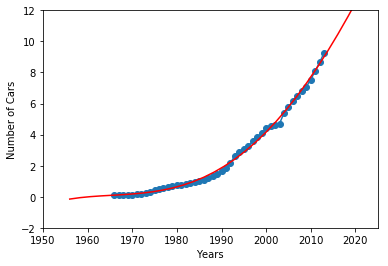

Degree = 5
----------
2014 Actual     : 	9.857915
2014 Prediction : 	9.78088596718
2015 Actual     : 	10.509258
2015 Prediction : 	10.4385060297
Average Prediction Accurcy : 	 %99.2726862825


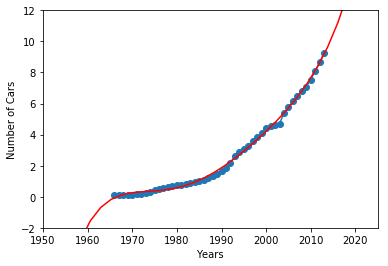

Degree = 6
----------
2014 Actual     : 	9.857915
2014 Prediction : 	10.2157079612
2015 Actual     : 	10.509258
2015 Prediction : 	11.2460325943
Average Prediction Accurcy : 	 %94.6798905998


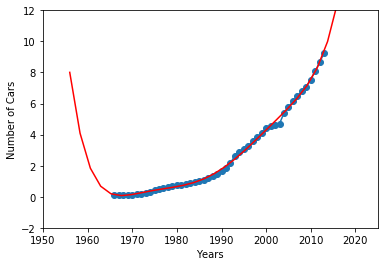

Degree = 7
----------
2014 Actual     : 	9.857915
2014 Prediction : 	9.95945829506
2015 Actual     : 	10.509258
2015 Prediction : 	10.6969261979
Average Prediction Accurcy : 	 %98.592094831


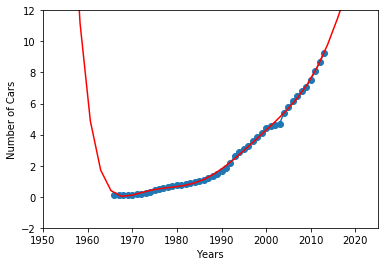

Degree = 8
----------
2014 Actual     : 	9.857915
2014 Prediction : 	9.58633475715
2015 Actual     : 	10.509258
2015 Prediction : 	9.77554558844
Average Prediction Accurcy : 	 %95.1317362137


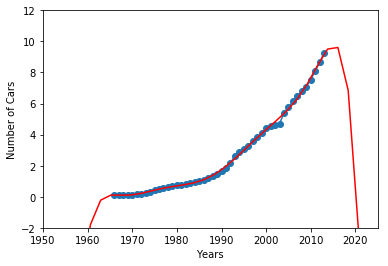

Degree = 9
----------
2014 Actual     : 	9.857915
2014 Prediction : 	10.0955481541
2015 Actual     : 	10.509258
2015 Prediction : 	11.2201038063
Average Prediction Accurcy : 	 %95.4127107764


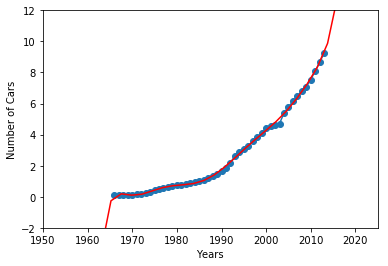

Degree = 10
----------
2014 Actual     : 	9.857915
2014 Prediction : 	10.6310020853
2015 Actual     : 	10.509258
2015 Prediction : 	12.9638140239
Average Prediction Accurcy : 	 %84.4007856257


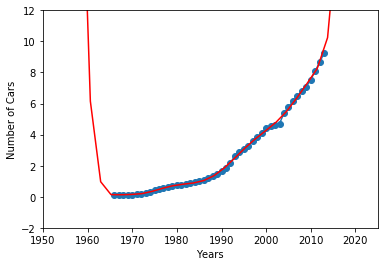

In [9]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
def predictForDegree(degree):

    ASample = np.hstack((np.power(x,i) for i in range(degree+1)))
    xxSample = np.matrix(np.linspace(np.asscalar(x[0])-10,np.asscalar(x[-1])+10,30)).T
    A2Sample = np.hstack((np.power(xxSample,i) for i in range(degree+1)))

    #plt.imshow(A, interpolation='nearest')
    # Solve the least squares problem
    w_ls,E,rank,sigma = np.linalg.lstsq(ASample, y)

    f = A2Sample*w_ls

    xTest = np.matrix([2014,2015]).T-BaseYear
    ATest = np.hstack((np.power(xTest,i) for i in range(degree+1)))
    fTest = ATest*w_ls
    
    actual2014 = float(df_arac_test[df_arac_test.Year == 2014].Car/1000000.)
    predicted2014 = fTest[0,0]
    accuracy2014 = 100 -(100 * abs(actual2014 - predicted2014) / actual2014)
    
    actual2015 = float(df_arac_test[df_arac_test.Year == 2015].Car/1000000.)
    predicted2015 = fTest[1,0]
    accuracy2015 = 100 - (100 * abs(actual2015 - predicted2015) / actual2015)
    averageAccuracy = (accuracy2014 + accuracy2015) / 2

    print("Degree = " + str(degree))
    print("----------")
    print("2014 Actual     : \t" + str(actual2014))
    print("2014 Prediction : \t" + str(predicted2014))
    print("2015 Actual     : \t" + str(actual2015))
    print("2015 Prediction : \t" + str(predicted2015))
    print("Average Prediction Accurcy : \t %" + str(averageAccuracy))

    plt.plot(x+BaseYear, y, 'o-')
    plt.plot(xxSample+BaseYear, f, 'r')

    plt.xlabel('Years')
    plt.ylabel('Number of Cars')

    plt.gca().set_ylim((-2,12))
    plt.gca().set_xlim((1950,2025))

    plt.show()
    return averageAccuracy

accuracy = dict()
for degree in range(1, 11):
    accuracy[degree] = predictForDegree(degree)
    

Compares accuracy rates according to degrees

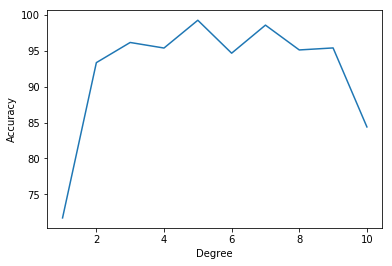

In [10]:

plt.clf()
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.plot(accuracy.keys(), accuracy.values())
plt.show()